# Py Learn Data Course

In [1]:
from pathlib import Path
import json
import csv
import time
import re

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
pd.set_option('display.max_columns', None)

%matplotlib inline

## Configuration

In [3]:
data_folder = Path().cwd().parent / 'data' / 'house_pricing'

csv_file = data_folder / 'python-panama-real-estate.csv'

print(f'Folder {data_folder} existe: {data_folder.exists()}')
print(f'CSv file: {csv_file.name}')

Folder /home/luiscberrocal/PycharmProjects/pylearn-data-101/data/house_pricing existe: True
CSv file: python-panama-real-estate.csv


## Loading data

### Normal load

In [4]:
df = pd.read_csv(csv_file)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733159 entries, 0 to 733158
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   status                    733159 non-null  object 
 1   price                     733088 non-null  float64
 2   bed                       617177 non-null  float64
 3   bath                      621407 non-null  float64
 4   Lot area (acres)          572378 non-null  float64
 5   Full Address              733159 non-null  object 
 6   street                    732069 non-null  object 
 7   city                      733087 non-null  object 
 8   state                     705907 non-null  object 
 9   Zip code                  732957 non-null  float64
 10  House size (square feet)  520772 non-null  float64
 11  sold_date                 347237 non-null  object 
 12  shootings_count           293781 non-null  float64
 13  bath_tub                  0 non-null       f

### PyArrow load

In [85]:
df = pd.read_csv(csv_file, engine='pyarrow', dtype_backend='pyarrow')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733159 entries, 0 to 733158
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype               
---  ------                    --------------   -----               
 0   status                    733159 non-null  string[pyarrow]     
 1   price                     733088 non-null  double[pyarrow]     
 2   bed                       617177 non-null  double[pyarrow]     
 3   bath                      621407 non-null  double[pyarrow]     
 4   Lot area (acres)          572378 non-null  double[pyarrow]     
 5   Full Address              733159 non-null  string[pyarrow]     
 6   street                    733159 non-null  string[pyarrow]     
 7   city                      733159 non-null  string[pyarrow]     
 8   state                     733159 non-null  string[pyarrow]     
 9   Zip code                  732957 non-null  double[pyarrow]     
 10  House size (square feet)  520772 non-null  double[pyarro

#### Setting categories

In [87]:
df['city'] = df['city'].astype('category')
df['state'] = df['state'].astype('category')
df['Zip code'] = df['Zip code'].astype('category')
df['status'] = df['status'].astype('category')

In [88]:
df['status'].value_counts()

status
for_sale          731566
ready_to_build      1593
Name: count, dtype: int64

## Exploración de datos

### Shape

In [89]:
print(f'Filas {df.shape[0]:,} Columnas: {df.shape[1]}')

Filas 733,159 Columnas: 14


### Head

In [90]:
df.head()

,status,price,bed,bath,Lot area (acres),Full Address,street,city,state,Zip code,House size (square feet),sold_date,shootings_count,bath_tub
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,,601.0,920.0,<NA>,<NA>,<NA>
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,,601.0,1527.0,<NA>,<NA>,<NA>
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,,795.0,748.0,<NA>,<NA>,<NA>
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,,731.0,1800.0,<NA>,<NA>,<NA>
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,,680.0,<NA>,<NA>,<NA>,<NA>


### Describe

In [91]:
df.describe()

,price,bed,bath,Lot area (acres),House size (square feet),sold_date,shootings_count
count,7.330880e+05,617177.000000,621407.000000,572378.000000,5.207720e+05,347237,293781.000000
mean,7.257017e+05,3.422041,2.540473,19.058585,2.192527e+03,2008-11-08,4.788407
min,0.000000e+00,1.000000,1.000000,0.000000,1.000000e+02,1901-01-01,1.000000
25%,2.375000e+05,2.000000,2.000000,0.140000,1.195000e+03,2002-08-26,1.000000
50%,4.190000e+05,3.000000,2.000000,0.350000,1.714000e+03,2009-07-22,3.000000
75%,7.250000e+05,4.000000,3.000000,1.380000,2.547250e+03,2017-10-12,7.000000
max,8.750000e+08,123.000000,198.000000,100000.000000,1.450112e+06,2023-03-01,36.000000
std,1.768769e+06,2.028735,2.002442,1022.007111,3.141461e+03,NaN,5.367337


### Histogramas

<Axes: >

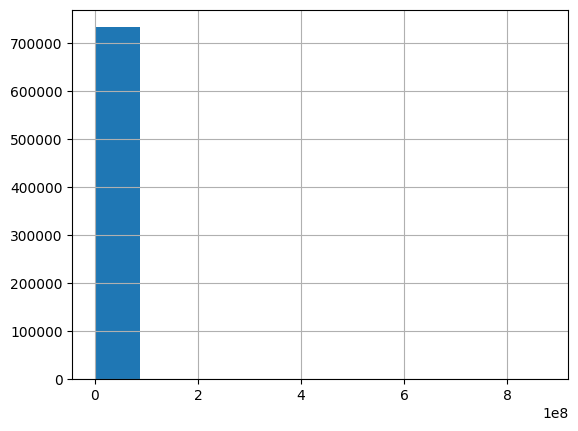

In [92]:
df['price'].hist(bins=10)

<Axes: >

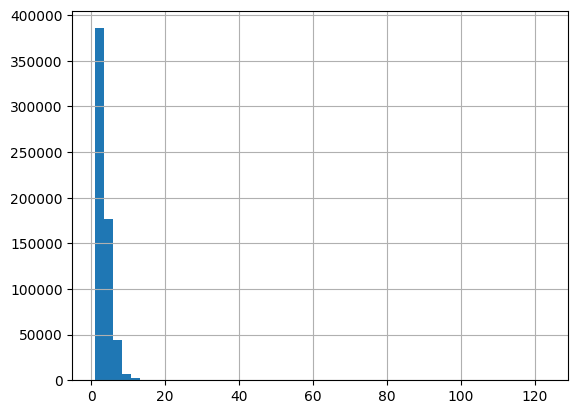

In [93]:
df['bed'].hist(bins=50)

### Valores Nulos

In [94]:
df.isna().sum()

status                           0
price                           71
bed                         115982
bath                        111752
Lot area (acres)            160781
Full Address                     0
street                           0
city                             0
state                            0
Zip code                       202
House size (square feet)    212387
sold_date                   385922
shootings_count             439378
bath_tub                    733159
dtype: int64

## Limpieza de datos

In [95]:
def calculate_outliers(df: pd.DataFrame, field_name:str) -> float:
    mean = df[field_name].mean()
    std = df[field_name].std()

    print(f'{field_name} Promedio: {mean:,.2f} Desviacion standard {std:,.2f}')
    outliers = mean + 3 * std
    return outliers

### Renombrando columnas

In [97]:
column_dict = {
  "Lot area (acres)": "area_acres",
  "Full Address": 'full_address',
  "Zip code": "zip_code",
  "House size (square feet)": 'house_area_square_feet',
}

In [98]:
df = df.rename(columns=column_dict)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733159 entries, 0 to 733158
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype               
---  ------                  --------------   -----               
 0   status                  733159 non-null  category            
 1   price                   733088 non-null  double[pyarrow]     
 2   bed                     617177 non-null  double[pyarrow]     
 3   bath                    621407 non-null  double[pyarrow]     
 4   area_acres              572378 non-null  double[pyarrow]     
 5   full_address            733159 non-null  string[pyarrow]     
 6   street                  733159 non-null  string[pyarrow]     
 7   city                    733159 non-null  category            
 8   state                   733159 non-null  category            
 9   zip_code                732957 non-null  category            
 10  house_area_square_feet  520772 non-null  double[pyarrow]     
 11  sold_date    

### Eliminando los valores nulos

In [104]:
df.isna().sum()

status                         0
price                          0
bed                            0
bath                           0
area_acres                     0
full_address                   0
street                         0
city                           0
state                          0
zip_code                      64
house_area_square_feet         0
sold_date                 175722
shootings_count           226020
bath_tub                  383547
dtype: int64

In [103]:
df = df.dropna(subset=['price', 'house_area_square_feet', 'area_acres', 'bed', 'bath'])

In [105]:
df.shape

(383547, 14)

### Camas

In [106]:
bed_mean = df['bed'].mean()
bed_std = df['bed'].std()

print(f'Promedio: {bed_mean:.2f} Desviacion standard {bed_std:.2f}')
outliers = bed_mean + 3 * bed_std

print(f'Outliers: +/- {outliers:.2f}')

Promedio: 3.78 Desviacion standard 2.17
Outliers: +/- 10.28


In [107]:
beds = df.loc[df['bed'] >= outliers]

print(beds.shape)

(4018, 14)


In [108]:
beds['bed'].describe()

count    4018.000000
mean       15.543803
std        10.301538
min        11.000000
25%        12.000000
50%        12.000000
75%        15.750000
max        99.000000
Name: bed, dtype: double[pyarrow]

In [109]:
df = df.drop(beds.index)

<Axes: >

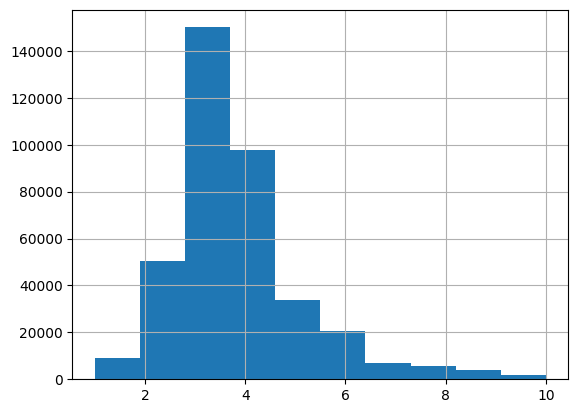

In [111]:
df['bed'].hist(bins=10)

### Banos

In [112]:
df['bath'].describe()

count    379529.000000
mean          2.598531
std           1.396594
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          19.000000
Name: bath, dtype: double[pyarrow]

In [113]:
bath_mean = df['bath'].mean()
bath_std = df['bath'].std()

print(f'Promedio: {bath_mean:.2f} Desviacion standard {bath_std:.2f}')
bath_outliers = bath_mean + 3 * bath_std

print(f'Outliers: +/- {bath_outliers:.2f}')

Promedio: 2.60 Desviacion standard 1.40
Outliers: +/- 6.79


In [114]:
baths = df.loc[df['bath'] >= outliers]

print(baths.shape)

(612, 14)


In [115]:
baths['bath'].describe()

count    612.000000
mean      12.151961
std        1.427385
min       11.000000
25%       11.000000
50%       12.000000
75%       13.000000
max       19.000000
Name: bath, dtype: double[pyarrow]

In [116]:
df = df.drop(baths.index)

<Axes: >

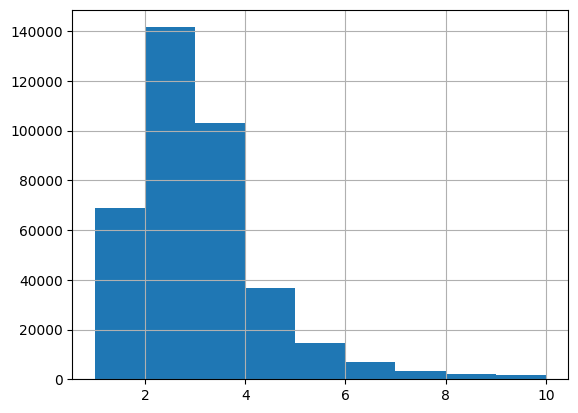

In [119]:
df['bath'].hist(bins=9)

### Precio

In [120]:
df['price'].describe()

count    3.789170e+05
mean     6.822882e+05
std      1.137430e+06
min      5.000000e+02
25%      2.700000e+05
50%      4.250000e+05
75%      7.000000e+05
max      1.000000e+08
Name: price, dtype: double[pyarrow]

In [121]:
price_mean = df['price'].mean()
price_std = df['price'].std()

print(f'Promedio: {price_mean:,.2f} Desviacion standard {price_std:,.2f}')
price_outliers = price_mean + 3 * price_std

print(f'Outliers: +/- {price_outliers:,.2f}')

Promedio: 682,288.21 Desviacion standard 1,137,430.41
Outliers: +/- 4,094,579.44


In [122]:
extreme = df.loc[df['price'] >= price_outliers]

extreme.shape

(5175, 14)

In [123]:
df = df.drop(extreme.index)

df.shape

(373742, 14)

<Axes: >

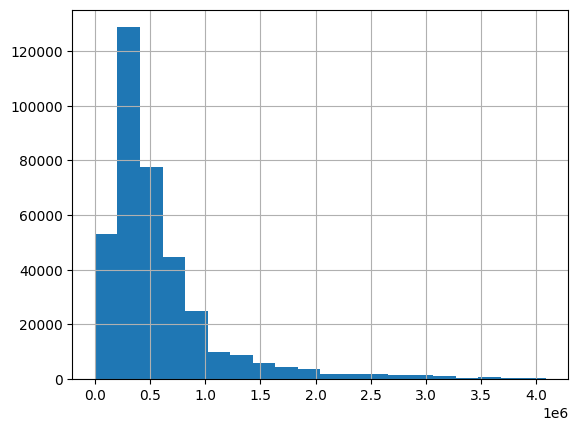

In [124]:
df['price'].hist(bins=20)

### Nuevos campos

#### Area en metros cuadrados

In [125]:
df['house_size_m2'] = df['house_area_square_feet'] * 0.092903
df['lot_size_m2'] = df['area_acres'] * 4046.86

In [126]:
df['house_size_m2'].describe()

count    373742.000000
mean        209.904529
std         195.861363
min          11.334166
25%         122.631960
50%         172.335065
75%         249.723264
max       37175.042547
Name: house_size_m2, dtype: double[pyarrow]

In [127]:
o = calculate_outliers(df, 'house_size_m2')

print(f'Outliers +/- {o:,.2f}')

house_size_m2 Promedio: 209.90 Desviacion standard 195.86
Outliers +/- 797.49


In [128]:
df['lot_size_m2'].describe()

count    3.737420e+05
mean     4.098296e+04
std      2.722740e+06
min      0.000000e+00
25%      5.260918e+02
50%      1.173589e+03
75%      3.763580e+03
max      4.046860e+08
Name: lot_size_m2, dtype: double[pyarrow]

#### Precio por metro cuadrado

In [129]:
df['price_x_m2'] = df['price'] / df['house_size_m2'] 

In [130]:
o = calculate_outliers(df, 'price_x_m2')

print(f'Outliers +/- {o:,.2f}')

price_x_m2 Promedio: 3,003.72 Desviacion standard 2,285.20
Outliers +/- 9,859.32


In [131]:
extreme_price_x_m2 = df.loc[df['price_x_m2'] >= o/3]

print(extreme_price_x_m2.shape)

(109513, 17)


In [132]:
df = df.drop(extreme_price_x_m2.index)

In [133]:
df.shape

(264229, 17)

<Axes: >

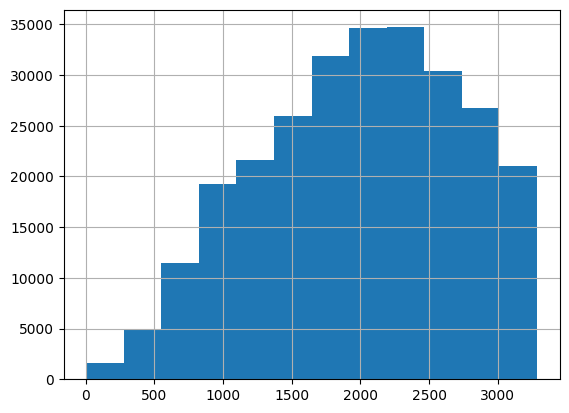

In [134]:
df['price_x_m2'].hist(bins=12)

In [135]:
df.isna().sum()

status                         0
price                          0
bed                            0
bath                           0
area_acres                     0
full_address                   0
street                         0
city                           0
state                          0
zip_code                      64
house_area_square_feet         0
sold_date                 116630
shootings_count           162352
bath_tub                  264229
house_size_m2                  0
lot_size_m2                    0
price_x_m2                     0
dtype: int64

## EDA

### Precio


<Axes: xlabel='house_size_m2', ylabel='price'>

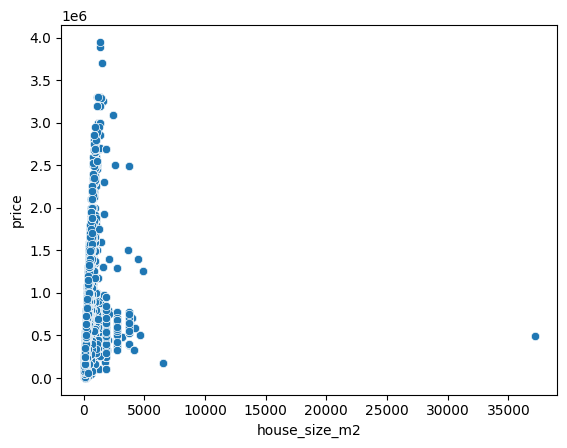

In [137]:
sns.scatterplot(data=df, x="house_size_m2", y="price")

### Limpieza de area


In [139]:
o = calculate_outliers(df, 'house_size_m2')

print(f'Outliers +/- {o:,.2f}')

house_size_m2 Promedio: 213.54 Desviacion standard 218.09
Outliers +/- 867.82


In [140]:
area_extreme = df.loc[df['house_size_m2'] >= o]

print(area_extreme.shape)

(1992, 17)


In [141]:
df = df.drop(area_extreme.index)

<Axes: xlabel='house_size_m2', ylabel='price'>

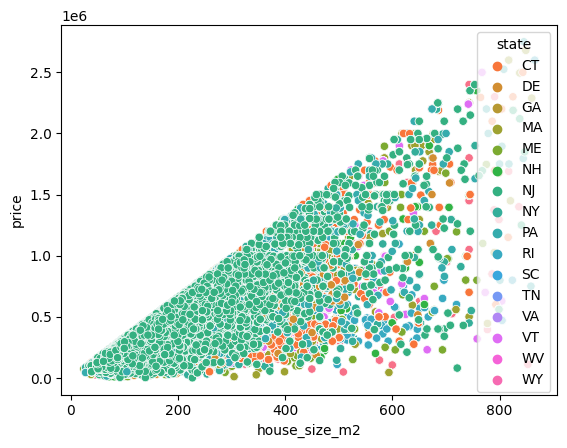

In [144]:
sns.scatterplot(data=df, x="house_size_m2", y="price", hue='state')

In [145]:
df['state'].value_counts()

state
CT    59368
NJ    54325
MA    44239
NH    18434
RI    17911
VT    17887
ME    17256
      14046
PA    11326
NY     5781
DE     1658
WV        3
WY        3
GA        0
SC        0
TN        0
VA        0
Name: count, dtype: int64

In [ ]:
sns.scatterplot(data=df.loc[df['state'] == 'CT'], x="house_size_m2", y="price", hue='city')

<Axes: xlabel='house_size_m2', ylabel='price'>